In [1]:
# Instalando o pacote de marca d'agua 
# Pacote usado para gravar as versões de outros pacotes  usados nesse notebbok
#!pip install -q -U watermark

# Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Versões dos pacotes usados neste notebok
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sys       : 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]
seaborn   : 0.11.2
pandas    : 1.4.2
numpy     : 1.22.4
matplotlib: 3.5.2



## Carregando os Dados

In [4]:
dadosRH = pd.read_csv("dadosRH.csv")

In [17]:
dadosRH.head(30)

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
5,58896,Analytics,Sul,Superior,M,Outsourcing,2,31,3.0,7,0
6,20379,Logistica,Sul,Superior,F,Outro,1,31,3.0,5,0
7,16290,Logistica,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,33,3.0,6,0
8,73202,Analytics,Sul,Superior,M,Outro,1,28,4.0,5,0
9,28911,Marketing,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,32,5.0,5,0


In [6]:
dadosRH.shape

(54808, 11)

## Análise Exploratoria, Limpeza e Transformação dos Dados

In [8]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
dadosRH.groupby(["educacao"]).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


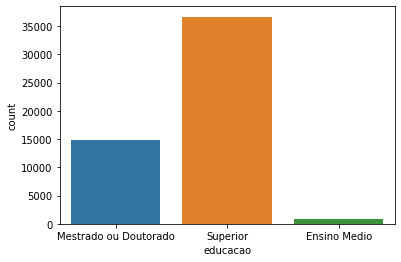

In [11]:
sns.countplot(dadosRH["educacao"]);

In [13]:
dadosRH.groupby(["aval_ano_anterior"]).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

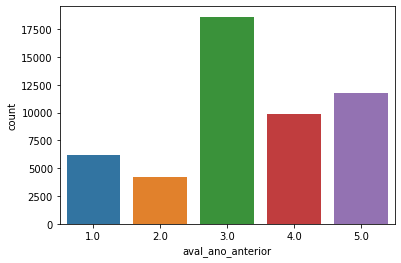

In [14]:
sns.countplot(dadosRH["aval_ano_anterior"])

# Preenchendo os dados faltantes com a moda

In [15]:
dadosRH["educacao"].fillna(dadosRH["educacao"].mode()[0], inplace=True) #Implace = True: salva os resultados na propria tabela

# Preencher os dados faltantes com a mediana 

In [16]:
dadosRH["aval_ano_anterior"].fillna(dadosRH["aval_ano_anterior"].median()[0], inplace=True)

In [18]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [19]:
dadosRH.groupby(["educacao"]).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [20]:
dadosRH.groupby(["aval_ano_anterior"]).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


***

## Desbalanceamento de classe para uma futura análise de Machine Learning, aumentando os exemplos minoritario usando uma tecnica estatística

In [21]:
dadosRH.groupby(["promovido"]).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

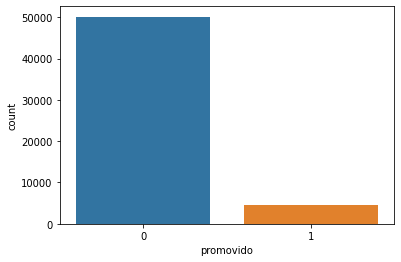

In [22]:
sns.countplot(dadosRH["promovido"])

In [23]:
df_classe_majoritario = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [24]:
df_classe_majoritario.shape

(50140, 11)

In [25]:
df_classe_minoritaria.shape

(4668, 11)

In [27]:
# Upsample da classe minoritaria
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, replace = True, n_samples=50140, random_state=150)

In [28]:
dadosRH_balanceados = pd.concat([df_classe_majoritario, df_classe_minoritaria_upsampled])

In [29]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [30]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

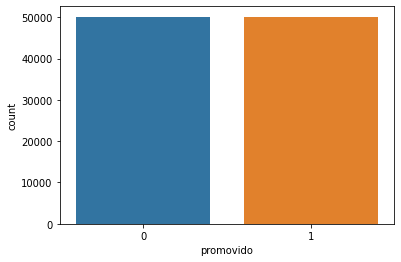

In [31]:
sns.countplot(dadosRH_balanceados["promovido"])

Salvando os dados em disco

In [ ]:
#dadosRH_balanceados.to_csv("dadosRH_modificado.csv", encoding="utf-8", index=False)

In [3]:
dataset = pd.read_csv("dadosRH_modificado.csv")
dataset.head(10)

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
5,58896,Analytics,Sul,Superior,M,Outsourcing,2,31,3.0,7,0
6,20379,Logistica,Sul,Superior,F,Outro,1,31,3.0,5,0
7,16290,Logistica,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,33,3.0,6,0
8,73202,Analytics,Sul,Superior,M,Outro,1,28,4.0,5,0
9,28911,Marketing,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,32,5.0,5,0


In [35]:
dataset.shape

(100280, 11)

***

# Pergunta 1 - Qual a correlação entre os atributos dos funcionários?

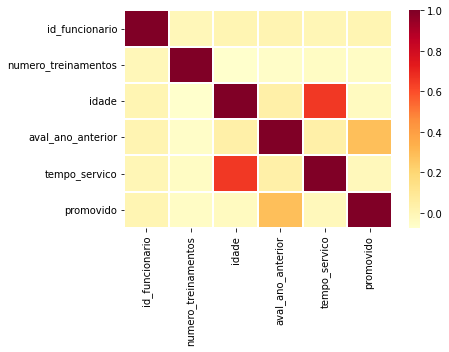

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths=0.1)
plt.show()

O ideal é matriz de correlação para variveis numericas e de associação para categoricas

# Pergunta 2 - Qual o tempo de serviço da maioria dos funcionários?

C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


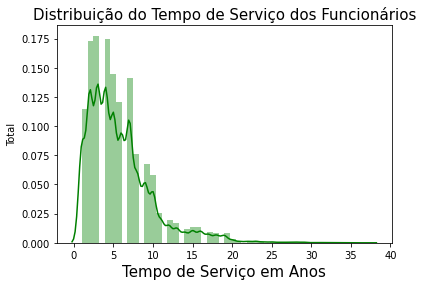

In [40]:
sns.distplot(dataset["tempo_servico"], color = "green")
plt.title("Distribuição do Tempo de Serviço dos Funcionários", fontsize=15)
plt.xlabel("Tempo de Serviço em Anos", fontsize=15)
plt.ylabel("Total")
plt.show();

# Pergunt 3 - Qual avaliação do ano anterior foi mais comum?

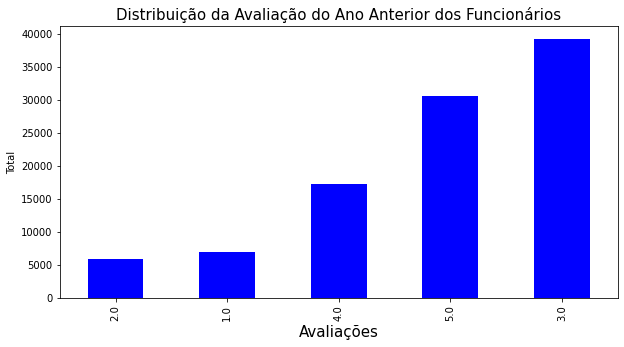

In [42]:
dataset["aval_ano_anterior"].value_counts().sort_values().plot.bar(color="blue", figsize=(10, 5))
plt.title("Distribuição da Avaliação do Ano Anterior dos Funcionários", fontsize=15)
plt.xlabel("Avaliações", fontsize=15)
plt.ylabel("Total")
plt.show()

# Pergunta 4 -Qual a distribuição das idades dos funcionários?

C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


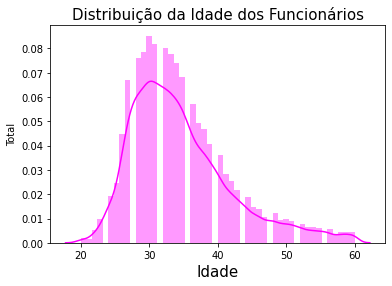

In [44]:
sns.distplot(dataset["idade"], color="magenta")
plt.title("Distribuição da Idade dos Funcionários", fontsize=15)
plt.xlabel("Idade", fontsize=15)
plt.ylabel("Total")
plt.show()

# Pergunta 5 - Qual o número de treinamentos mais frequente?

C:\Users\kenne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


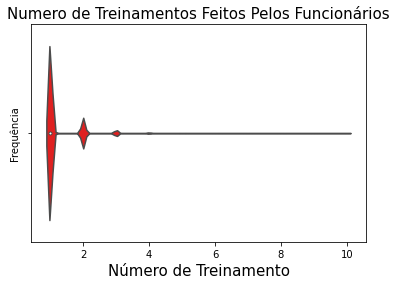

In [45]:
sns.violinplot(dataset["numero_treinamentos"], color="red")
plt.title("Numero de Treinamentos Feitos Pelos Funcionários", fontsize=15)
plt.xlabel("Número de Treinamento", fontsize=15)
plt.ylabel("Frequência")
plt.show()

# Pergunta 6 - Qual a proporção dos funcionários por canal de recrutamento?

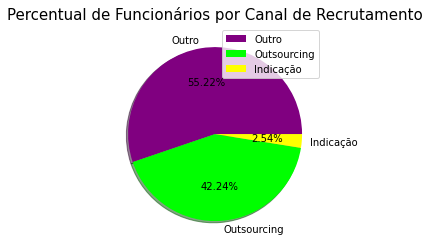

In [7]:
dataset["canal_recrutamento"].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro","Outsourcing", "Indicação"
colors = ["purple", "lime", "yellow"] 
explode = [0,0,0]
plt.pie(fatias, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.title("Percentual de Funcionários por Canal de Recrutamento", fontsize=15)
plt.axis("off")
plt.legend()
plt.show()

# Pergunta 7 - Qual a relação da promoção e a avaliação do ano anterior

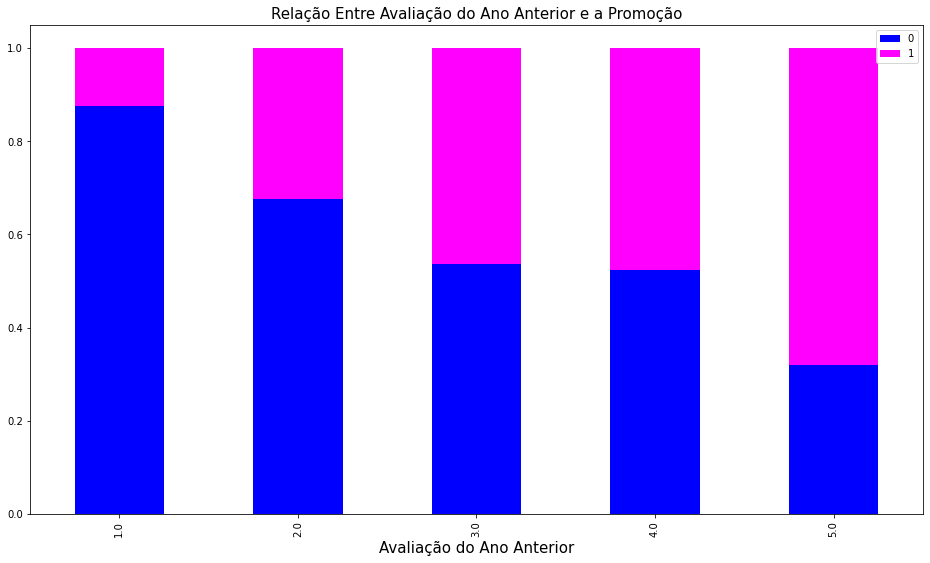

In [9]:
data = pd.crosstab(dataset["aval_ano_anterior"], dataset["promovido"]) # Tabela cruzada com a primeira e a segunda variavel
data.div(data.sum(1).astype(float), axis=0).plot(kind="bar", #Dividir a tabela cruzada pelo somátorio 
                                                 stacked = True, # Mesma barra com dois valores
                                                 figsize = (16 , 9),
                                                 color = ["blue", "magenta"])
plt.title("Relação Entre Avaliação do Ano Anterior e a Promoção", fontsize=15)
plt.xlabel("Avaliação do Ano Anterior", fontsize=15)
plt.legend()
plt.show()

# Fim!